# WHERE I CLEANED MY DATA, DEALT WITH MISSING COLUMNS, DEALT WITH OUTLIERS N THE ENTIRE DATA CLEANING PROCESS, PERFORMED SOME FEATURE ENGINEERING

In [34]:
import pandas as pd
from datetime import datetime

# Load the CSV file  
file_path = r'C:\Users\AMON\Desktop\C200\data\raw\rates.csv'

df = pd.read_csv(file_path)

# List the columns you want to keep
columns_to_keep = ['price', 'no_of_bedrooms', 'no_of_bathrooms', 'sqft_living', 
                   'sqft_lot', 'no_of_floors', 'yr_built', 'zipcode']

# Drop all other columns
df_filtered = df[columns_to_keep]

# Save the filtered data to a new CSV 
output_path = r'C:\Users\AMON\Desktop\C200\data\raw\rates_filtered.csv'

# Now save the filtered DataFrame to this absolute path
df_filtered.to_csv(output_path, index=False)


# Check the result
print(df_filtered.head())




      price  no_of_bedrooms  no_of_bathrooms  sqft_living  sqft_lot  \
0  231300.0               2             1.00         1180      5650   
1  538000.0               3             2.25         2570      7242   
2  180000.0               2             1.00          770     10000   
3  604000.0               4             3.00         1960      5000   
4  510000.0               3             2.00         1680      8080   

   no_of_floors  yr_built  zipcode  
0           1.0      1955    98178  
1           2.0      1951    98125  
2           1.0      1933    98028  
3           1.0      1965    98136  
4           1.0      1987    98074  


# LETS CREATE A NEW COLUMN (house_age) CAUSE YR_BUILT WONT BE AS HELPFUL TO THE MODEL AS HOUSE_AGE WILL BE

In [ ]:
import pandas as pd
from datetime import datetime

# Load the filtered CSV file
output_path = r'C:\Users\AMON\Desktop\C200\data\raw\rates_filtered.csv'
df_filtered = pd.read_csv(output_path)

# Get the current year (2024)
current_year = 2024

# Calculate house age: current year minus the year it was built
df_filtered['house_age'] = current_year - df_filtered['yr_built']

# Save the updated DataFrame to the same CSV file
df_filtered.to_csv(output_path, index=False)


# Drop the 'yr_built' column
df_filtered = df_filtered.drop(columns=['yr_built'])

# Save the updated DataFrame back to the same CSV file
df_filtered.to_csv(output_path, index=False)

#print the first few rows to confirm the column is removed
print(df_filtered.head())




      price  no_of_bedrooms  no_of_bathrooms  sqft_living  sqft_lot  \
0  231300.0               2             1.00         1180      5650   
1  538000.0               3             2.25         2570      7242   
2  180000.0               2             1.00          770     10000   
3  604000.0               4             3.00         1960      5000   
4  510000.0               3             2.00         1680      8080   

   no_of_floors  zipcode  house_age  
0           1.0    98178         69  
1           2.0    98125         73  
2           1.0    98028         91  
3           1.0    98136         59  
4           1.0    98074         37  
      price  no_of_bedrooms  no_of_bathrooms  sqft_living  sqft_lot  \
0  231300.0               2             1.00         1180      5650   
1  538000.0               3             2.25         2570      7242   
2  180000.0               2             1.00          770     10000   
3  604000.0               4             3.00         1960    

In [ ]:
import pandas as pd

# Load the filtered CSV file
output_path = r'C:\Users\AMON\Desktop\C200\data\raw\rates_filtered.csv'
df_filtered = pd.read_csv(output_path)

# Display all columns and their data types
print(df_filtered.dtypes)

#check whether any column has missing values
print(df_filtered.isnull().sum())


price              float64
no_of_bedrooms       int64
no_of_bathrooms    float64
sqft_living          int64
sqft_lot             int64
no_of_floors       float64
zipcode              int64
house_age            int64
dtype: object
price              0
no_of_bedrooms     0
no_of_bathrooms    0
sqft_living        0
sqft_lot           0
no_of_floors       0
zipcode            0
house_age          0
dtype: int64


In [39]:
#check the number of unique characters in zip_code
#in order to decide wherher to use one hot or label encoding
unique_zipcodes = df_filtered['zipcode'].nunique()
print(f"Number of distinct zip codes: {unique_zipcodes}")


Number of distinct zip codes: 70


Number of outliers (IQR method): 1159
         price
5    1230000.0
21   2000000.0
49   1350000.0
69   1330000.0
125  1450000.0
Number of outliers (Z-score method): 406
         price
21   2000000.0
153  2250000.0
246  2400000.0
269  2900000.0
282  2050000.0


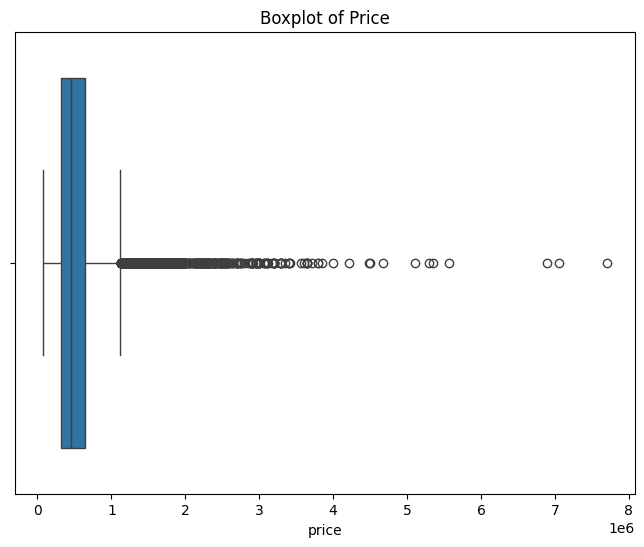

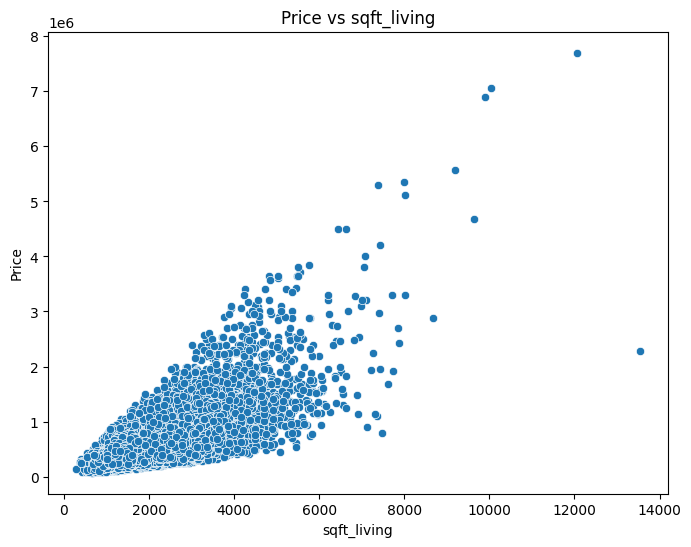

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
data_path = r'C:\Users\AMON\Desktop\C200\data\raw\rates_filtered.csv'
dataset = pd.read_csv(data_path)

# Step 1: Identify Outliers using IQR (Interquartile Range)
Q1 = dataset['price'].quantile(0.25)
Q3 = dataset['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers (outside of 1.5 * IQR from Q1 and Q3)
outliers_iqr = dataset[(dataset['price'] < (Q1 - 1.5 * IQR)) | (dataset['price'] > (Q3 + 1.5 * IQR))]

print(f"Number of outliers (IQR method): {outliers_iqr.shape[0]}")
print(outliers_iqr[['price']].head())

# Step 2: Identify Outliers using Z-score
z_scores = stats.zscore(dataset['price'])
outliers_z = dataset[np.abs(z_scores) > 3]  # Common threshold for Z-score is 3

print(f"Number of outliers (Z-score method): {outliers_z.shape[0]}")
print(outliers_z[['price']].head())

# Step 3: Visualize outliers using a boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x=dataset['price'])
plt.title('Boxplot of Price')
plt.show()

# Step 4: Visualize outliers using a scatter plot (if you want to compare with other features)
# Example: Plotting price against sqft_living
plt.figure(figsize=(8,6))
sns.scatterplot(x=dataset['sqft_living'], y=dataset['price'])
plt.title('Price vs sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.show()


In [2]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the dataset
data_path = r'C:\Users\AMON\Desktop\C200\data\raw\rates_filtered.csv'
dataset = pd.read_csv(data_path)

# Identify and remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

# Remove outliers using the Z-score method
def remove_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[column]))
    df_no_outliers = df[z_scores < threshold]
    return df_no_outliers

# Step 1: Remove outliers using IQR method
dataset_no_outliers_iqr = remove_outliers_iqr(dataset, 'price')

# Step 2: Remove outliers using Z-score method
dataset_no_outliers_zscore = remove_outliers_zscore(dataset, 'price')

# Compare the sizes of the datasets before and after removing outliers
print(f"Original dataset size: {dataset.shape[0]}")
print(f"Dataset size after IQR removal: {dataset_no_outliers_iqr.shape[0]}")
print(f"Dataset size after Z-score removal: {dataset_no_outliers_zscore.shape[0]}")

# Optionally, you can save the cleaned datasets to new CSV files
dataset_no_outliers_iqr.to_csv('cleaned_dataset_iqr.csv', index=False)
dataset_no_outliers_zscore.to_csv('cleaned_dataset_zscore.csv', index=False)

# You can now use the cleaned dataset to retrain your model


Original dataset size: 21613
Dataset size after IQR removal: 20454
Dataset size after Z-score removal: 21207


Number of outliers (IQR method): 0
Empty DataFrame
Columns: [price]
Index: []
Number of outliers (Z-score method): 0
Empty DataFrame
Columns: [price]
Index: []


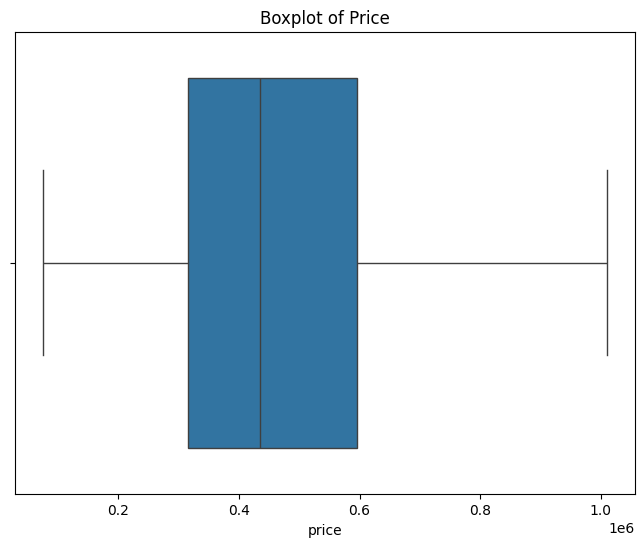

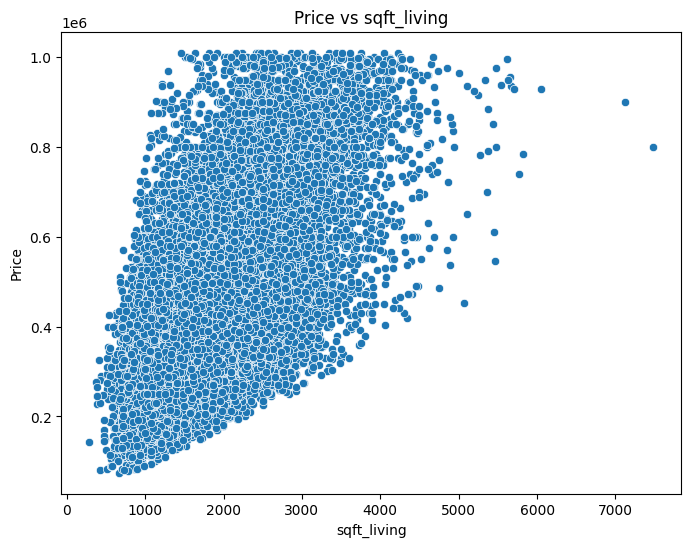

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
data_path = r'C:\Users\AMON\Desktop\C200\extras\cleaned_dataset_iqrered.csv'
dataset = pd.read_csv(data_path)

# Step 1: Identify Outliers using IQR (Interquartile Range)
Q1 = dataset['price'].quantile(0.25)
Q3 = dataset['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers (outside of 1.5 * IQR from Q1 and Q3)
outliers_iqr = dataset[(dataset['price'] < (Q1 - 1.5 * IQR)) | (dataset['price'] > (Q3 + 1.5 * IQR))]

print(f"Number of outliers (IQR method): {outliers_iqr.shape[0]}")
print(outliers_iqr[['price']].head())

# Step 2: Identify Outliers using Z-score
z_scores = stats.zscore(dataset['price'])
outliers_z = dataset[np.abs(z_scores) > 3]  # Common threshold for Z-score is 3

print(f"Number of outliers (Z-score method): {outliers_z.shape[0]}")
print(outliers_z[['price']].head())

# Step 3: Visualize outliers using a boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x=dataset['price'])
plt.title('Boxplot of Price')
plt.show()

# Step 4: Visualize outliers using a scatter plot (if you want to compare with other features)
# Example: Plotting price against sqft_living
plt.figure(figsize=(8,6))
sns.scatterplot(x=dataset['sqft_living'], y=dataset['price'])
plt.title('Price vs sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.show()


In [4]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the dataset
data_path = r'C:\Users\AMON\Desktop\C200\extras\cleaned_dataset_iqrer.csv'
dataset = pd.read_csv(data_path)

# Identify and remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

# Remove outliers using the Z-score method
def remove_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[column]))
    df_no_outliers = df[z_scores < threshold]
    return df_no_outliers

# Step 1: Remove outliers using IQR method
dataset_no_outliers_iqr = remove_outliers_iqr(dataset, 'price')

# Step 2: Remove outliers using Z-score method
dataset_no_outliers_zscore = remove_outliers_zscore(dataset, 'price')

# Compare the sizes of the datasets before and after removing outliers
print(f"Original dataset size: {dataset.shape[0]}")
print(f"Dataset size after IQR removal: {dataset_no_outliers_iqr.shape[0]}")
print(f"Dataset size after Z-score removal: {dataset_no_outliers_zscore.shape[0]}")

# Optionally, you can save the cleaned datasets to new CSV files
dataset_no_outliers_iqr.to_csv('cleaned_dataset_iqrered.csv', index=False)
dataset_no_outliers_zscore.to_csv('cleaned_dataset_zscorered.csv', index=False)

# You can now use the cleaned dataset to retrain your model


Original dataset size: 20194
Dataset size after IQR removal: 20177
Dataset size after Z-score removal: 20194
